<a href="https://colab.research.google.com/github/pavithradeepue/Pathfinder_Bharath/blob/main/Pathfinder_Bharat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!file archive.zip




archive.zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [2]:
!apt-get install p7zip-full
!7z x archive.zip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 3145728 bytes (3072 KiB)

Extracting archive: archive.zip

ERRORS:
Unexpected end of archive

--
Path = archive.zip
Type = zip
ERRORS:
Unexpected end of archive
Physical Size = 3147724

  0%    ERROR: Data Error : cleaned_dataset/data/00128.csv
100% 127 - cleaned_dataset/data/00128.csv                                         
Sub items Errors: 1

Archives with Errors: 1

Open Errors: 1

Sub items Errors: 1


RANDOM FOREST (Battery SoH)

In [5]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
!ls


archive.zip  cleaned_dataset  sample_data


In [11]:
!ls cleaned_dataset/data


00001.csv  00816.csv  01631.csv  02446.csv  03261.csv  04076.csv  04891.csv
00002.csv  00817.csv  01632.csv  02447.csv  03262.csv  04077.csv  04892.csv
00003.csv  00818.csv  01633.csv  02448.csv  03263.csv  04078.csv  04893.csv
00004.csv  00819.csv  01634.csv  02449.csv  03264.csv  04079.csv  04894.csv
00005.csv  00820.csv  01635.csv  02450.csv  03265.csv  04080.csv  04895.csv
00006.csv  00821.csv  01636.csv  02451.csv  03266.csv  04081.csv  04896.csv
00007.csv  00822.csv  01637.csv  02452.csv  03267.csv  04082.csv  04897.csv
00008.csv  00823.csv  01638.csv  02453.csv  03268.csv  04083.csv  04898.csv
00009.csv  00824.csv  01639.csv  02454.csv  03269.csv  04084.csv  04899.csv
00010.csv  00825.csv  01640.csv  02455.csv  03270.csv  04085.csv  04900.csv
00011.csv  00826.csv  01641.csv  02456.csv  03271.csv  04086.csv  04901.csv
00012.csv  00827.csv  01642.csv  02457.csv  03272.csv  04087.csv  04902.csv
00013.csv  00828.csv  01643.csv  02458.csv  03273.csv  04088.csv  04903.csv
00014.csv  0

In [6]:
import pandas as pd
import glob

# Get all CSV file paths
csv_files = glob.glob("cleaned_dataset/data/*.csv")

# Read and combine
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.head()


,Sense_current,Battery_current,Current_ratio,Battery_impedance,Rectified_Impedance,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,Current_charge,Voltage_charge
0,(917.128662109375-48.64159393310547j),(239.27084350585938-70.36351013183594j),(3.5829445672977696+0.8503625408282353j),(0.02873559555149435+0.07923837710795778j),(0.16835276565960625-0.016739143666503312j),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(912.2642211914062-55.18647766113281j),(245.4940185546875-63.60420227050781j),(3.536861625120432+0.6915556865512986j),(0.009471056923575902-0.041870344865177656j),(0.16251680689177636-0.015866697697214105j),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(910.5548095703125-56.56088638305664j),(246.9105987548828-62.00759506225586j),(3.523122867554579+0.655700851074299j),(0.0882884157534047-0.11005724476110613j),(0.15464787508987274-0.018522128694659808j),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(909.8177490234375-58.285980224609375j),(248.5675048828125-61.491920471191406j),(3.5038210032037633+0.6323059095105166j),(0.18377436232336375-0.11050878537372556j),(0.14952901687940895-0.017663165379891706j),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(904.5674438476562-52.242916107177734j),(253.01429748535156-56.543643951416016j),(3.449050899175289+0.5643119433373813j),(0.2569135008635889-0.07204913419323991j),(0.14320297210607918-0.01836411119279964j),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape
df.columns


Index(['Sense_current', 'Battery_current', 'Current_ratio',
       'Battery_impedance', 'Rectified_Impedance', 'Voltage_measured',
       'Current_measured', 'Temperature_measured', 'Current_load',
       'Voltage_load', 'Time', 'Current_charge', 'Voltage_charge'],
      dtype='object')

In [8]:
features = [
    'Voltage_measured',
    'Current_measured',
    'Temperature_measured',
    'Battery_impedance',
    'Rectified_Impedance',
    'Voltage_load',
    'Current_load'
]


In [9]:
# Keep only required columns
df_model = df[features].copy()

# Remove rows with missing values
df_model.dropna(inplace=True)

# Remove impossible values
df_model = df_model[df_model['Battery_impedance'] > 0]


In [10]:
# Reference (best health = minimum impedance)
min_impedance = df_model['Battery_impedance'].min()

df_model['SoH'] = (min_impedance / df_model['Battery_impedance']) * 100

# Clamp values to [0, 100]
df_model['SoH'] = df_model['SoH'].clip(0, 100)

df_model[['Battery_impedance', 'SoH']].head()


,Battery_impedance,SoH


In [17]:
X = df_model[features]
y = df_model['SoH']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [11]:
df.shape


(93618, 13)

In [12]:
df[features].isna().sum()


,0
Voltage_measured,1248
Current_measured,1249
Temperature_measured,1249
Battery_impedance,92370
Rectified_Impedance,92604
Voltage_load,75279
Current_load,75279


In [13]:
df_model.shape


(0, 8)

In [14]:
features = [
    'Voltage_measured',
    'Current_measured',
    'Temperature_measured',
    'Voltage_load',
    'Current_load'
]


In [15]:
df_model = df[features].copy()

df_model.dropna(inplace=True)

df_model.shape


(18339, 5)

In [16]:
reference_voltage = df_model['Voltage_measured'].max()

df_model['SoH'] = (df_model['Voltage_measured'] / reference_voltage) * 100
df_model['SoH'] = df_model['SoH'].clip(0, 100)


In [17]:
df_model[['Voltage_measured', 'SoH']].head()


,Voltage_measured,SoH
96,4.193890,98.754948
97,4.193165,98.737879
98,3.989408,93.939945
99,3.963639,93.333154
100,3.943357,92.855562


In [18]:
X = df_model[
    ['Voltage_measured',
     'Current_measured',
     'Temperature_measured',
     'Voltage_load',
     'Current_load']
]

y = df_model['SoH']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

y_pred = rf_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.002081678760295328
R²: 0.9999973372067934


LSTM (Range Prediction)

In [21]:
# Recreate df_model safely
features = [
    'Voltage_measured',
    'Current_measured',
    'Temperature_measured',
    'Voltage_load',
    'Current_load'
]

df_model = df[features].copy()
df_model.dropna(inplace=True)

df_model.shape


(18339, 5)

In [26]:
import numpy as np

# --- Ensure df_model exists ---
features = [
    'Voltage_measured',
    'Current_measured',
    'Temperature_measured',
    'Voltage_load',
    'Current_load'
]

df_model = df[features].copy()
df_model.dropna(inplace=True)

# --- Ensure SoH exists ---
reference_voltage = df_model['Voltage_measured'].max()
df_model['SoH'] = (df_model['Voltage_measured'] / reference_voltage) * 100
df_model['SoH'] = df_model['SoH'].clip(0, 100)

# --- Create LSTM sequences ---
SEQUENCE_LENGTH = 20

X = df_model[features].values
y = df_model['SoH'].values

X_seq, y_seq = [], []

for i in range(len(X) - SEQUENCE_LENGTH):
    X_seq.append(X[i:i + SEQUENCE_LENGTH])
    y_seq.append(y[i + SEQUENCE_LENGTH])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# --- Check shapes ---
X_seq.shape, y_seq.shape


((18319, 20, 5), (18319,))

In [27]:
# 80% train, 20% test
split_index = int(0.8 * len(X_seq))

X_train = X_seq[:split_index]
X_test  = X_seq[split_index:]

y_train = y_seq[:split_index]
y_test  = y_seq[split_index:]

X_train.shape, X_test.shape


((14655, 20, 5), (3664, 20, 5))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(20, 5)),
    LSTM(32),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 5522.6807 - val_loss: 4538.0498
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 4188.8716 - val_loss: 3669.0557
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3360.4192 - val_loss: 2948.1287
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2689.1001 - val_loss: 2348.2092
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2126.7024 - val_loss: 1849.0674


In [30]:
test_loss = model.evaluate(X_test, y_test)
print("Test MSE:", test_loss)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1724.0758
Test MSE: 1729.310302734375


In [31]:
y_pred = model.predict(X_test)

y_pred[:5], y_test[:5]


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


(array([[39.010582],
        [39.010582],
        [39.010582],
        [39.010582],
        [39.010582]], dtype=float32),
 array([79.12538889, 79.05063472, 78.97942707, 78.89898924, 78.82268838]))

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Flatten for scaling
X_flat = X_seq.reshape(-1, 5)

X_scaled = scaler.fit_transform(X_flat)

# Reshape back
X_seq_scaled = X_scaled.reshape(X_seq.shape)


In [33]:
y_min = y_seq.min()
y_max = y_seq.max()

y_scaled = (y_seq - y_min) / (y_max - y_min)


In [34]:
split_index = int(0.8 * len(X_seq_scaled))

X_train = X_seq_scaled[:split_index]
X_test  = X_seq_scaled[split_index:]

y_train = y_scaled[:split_index]
y_test  = y_scaled[split_index:]


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

model = Sequential([
    Input(shape=(20, 5)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 20, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0409 - val_loss: 0.0013
Epoch 2/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 3/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0014 - val_loss: 8.7033e-04
Epoch 4/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0012 - val_loss: 7.7541e-04
Epoch 5/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0011 - val_loss: 8.3698e-04
Epoch 6/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0010 - val_loss: 6.8140e-04
Epoch 7/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0010 - val_loss: 6.5604e-04
Epoch 8/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 9.5747e-04 - val_loss: 7.0804e-04
Epoch 9/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8.1790e-04 - val_loss: 9.7074e-04
Epoch 10/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0011 - val_loss: 5.8574e-04
Epoch 11/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 7.7427e-04 - val_loss: 5.13

In [39]:
test_loss = model.evaluate(X_test, y_test)
print("Test MSE:", test_loss)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010
Test MSE: 0.0008581320289522409


In [40]:
y_pred_scaled = model.predict(X_test)

# Reverse scaling
y_pred = y_pred_scaled * (y_max - y_min) + y_min
y_test_original = y_test * (y_max - y_min) + y_min

y_pred[:5], y_test_original[:5]


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


(array([[79.72900012],
        [79.66819974],
        [79.60851691],
        [79.52352539],
        [79.44008644]]),
 array([79.12538889, 79.05063472, 78.97942707, 78.89898924, 78.82268838]))

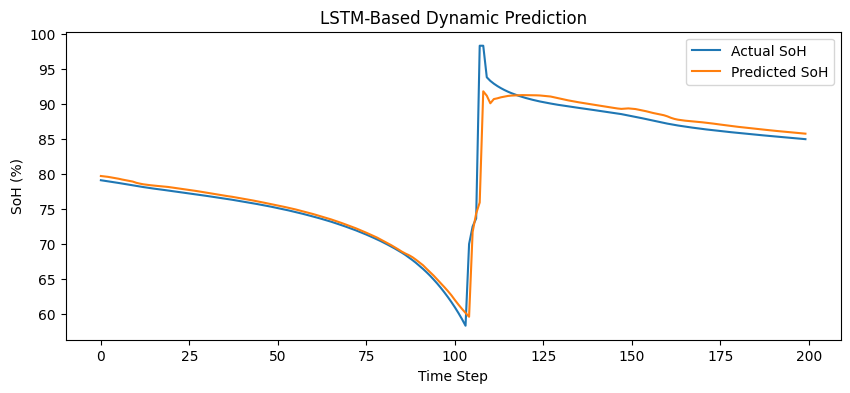

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(y_test_original[:200], label="Actual SoH")
plt.plot(y_pred[:200], label="Predicted SoH")
plt.xlabel("Time Step")
plt.ylabel("SoH (%)")
plt.title("LSTM-Based Dynamic Prediction")
plt.legend()
plt.show()


In [43]:
model.save("lstm_dynamic_prediction_model.keras")

